In [247]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [248]:
df=pd.read_csv('Processed_data.csv')

In [249]:
df.columns

Index(['Visa_Class', 'Employer_Name', 'SOC_Title', 'Job_Title',
       'Full_Time_Position', 'Worksite', 'Prevailing_Wage', 'Unit_Of_Pay',
       'Employer_Location', 'Employer_Country', 'Case_Status', 'Quarter',
       'State', 'Transformed_SOC_Title'],
      dtype='object')

In [250]:
df=df[df['Unit_Of_Pay']=='Year']

In [251]:
df = df.sample(frac=0.4, random_state=42)


<AxesSubplot:title={'center':'CASE STATUS vs NUMBER OF PETITIONS'}, xlabel='CASE STATUS', ylabel='NUMBER OF PETITIONS'>

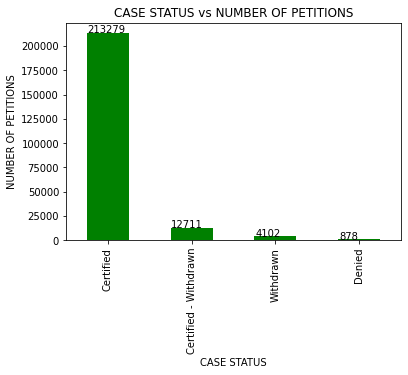

In [252]:
plot_status_number = df['Case_Status'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plot_status_number

In [253]:
df

,Visa_Class,Employer_Name,SOC_Title,Job_Title,Full_Time_Position,Worksite,Prevailing_Wage,Unit_Of_Pay,Employer_Location,Employer_Country,Case_Status,Quarter,State,Transformed_SOC_Title
444791,H-1B,ONDEMAND AGILITY SOLUTIONS INC.,"['Software', 'Developers']",SOFTWARE DEVELOPER,Y,"Ashburn, Virginia",98550.00,Year,"King Of Prussia, Pennsylvania",United States Of America,Certified,Q3,Virginia,"Developers, Software"
437458,H-1B,"Query.AI, Inc","['Software', 'Developers']",Software Development Engineer in Test,Y,"Brookings, South Dakota",66830.00,Year,"Brookings , South Dakota",United States Of America,Certified,Q3,South Dakota,"Developers, Software"
578524,H-1B,BITFLOW INNOVATIVE GROUP INC,"['Software', 'Developers']",Software Developer,Y,"Chantilly, Virginia",110240.00,Year,"Chantilly, Virginia",United States Of America,Certified,Q4,Virginia,"Developers, Software"
44857,H-1B,FORD MOTOR COMPANY,"['Software', 'Developers', 'Systems', 'Software']",Embedded Software Engineer – Audio Technologies,Y,"Farmington Hills, Michigan",63877.00,Year,"Dearborn, Michigan",United States Of America,Certified,Q1,Michigan,"Developers, Software, Systems"
550277,H-1B,"Meta Platforms, Inc.","['Information', 'Technology', 'Project', 'Mana...",Technical Program Manager,Y,"Seattle, Washington",125611.00,Year,"Menlo Park, California",United States Of America,Certified,Q4,Washington,"Information, Project, Technology"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13755,H-1B,Grants / Cibola County Schools,"['Elementary', 'School', 'Teachers', 'Except',...",Public School Teacher,Y,"Grants, New Mexico",41000.00,Year,"Grants, New Mexico",United States Of America,Certified,Q1,New Mexico,Education
84585,H-1B,Amazon.com Services LLC,"['Operations', 'Research', 'Analysts']",Training Specialist III,Y,"Seattle, Washington",72155.00,Year,"Seattle, Washington",United States Of America,Certified,Q1,Washington,Analysts
493718,H-1B,University of Nebraska at Omaha,"['Computer', 'Systems', 'Analysts']",Business Analyst II,Y,"Omaha, Nebraska",70366.00,Year,"Omaha, Nebraska",United States Of America,Certified,Q3,Nebraska,"Analysts, Computer, Systems"
228500,H-1B,"Salesforce.com, Inc.","['Information', 'Security', 'Analysts']",Senior Security Engineering,Y,"Bellevue, Washington",114899.00,Year,"San Francisco, California",United States Of America,Certified,Q2,Washington,Analysts


In [254]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [255]:
categorical_cols = df.select_dtypes(include=['object']).columns
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough'
)

In [256]:
df['Case_Status'] = df['Case_Status'].apply(lambda x: 1 if x == 'Certified' else 0)

In [257]:
df['City']=df['Worksite'].apply(lambda x: x.split(', ')[0])

In [258]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your large DataFrame and 'Case_Status' is the target variable
X = df.drop('Case_Status', axis=1)
y = df['Case_Status']

# Split the dataset into 'Certified' and 'Not Certified'
X_certified = X[y == 1]
y_certified = y[y == 1]
X_not_certified = X[y == 0]
y_not_certified = y[y == 0]

# Sample a higher proportion of 'Not Certified' cases
X_certified_sample, _, y_certified_sample, _ = train_test_split(X_certified, y_certified, test_size=0.9, random_state=42)
X_not_certified_sample, _, y_not_certified_sample, _ = train_test_split(X_not_certified, y_not_certified, test_size=0.02, random_state=42)

# Combine the samples
X_sample = pd.concat([X_certified_sample, X_not_certified])
y_sample = pd.concat([y_certified_sample, y_not_certified])


In [259]:
X=X_sample
y=y_sample

In [260]:
sum(y)/len(y)

0.5465938797478087

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

# Define a dictionary to hold the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [262]:
X_train=X_train[['Visa_Class', 'Employer_Name', 'SOC_Title', 'Job_Title',
       'Full_Time_Position', 'Worksite', 'Prevailing_Wage', 'Unit_Of_Pay',
        'Employer_Country', 'Quarter',
       'State']]
X_test = X_test[['Visa_Class', 'Employer_Name', 'SOC_Title', 'Job_Title',
       'Full_Time_Position', 'Worksite', 'Prevailing_Wage', 'Unit_Of_Pay',
        'Employer_Country', 'Quarter',
       'State']]

In [263]:
categorical_cols=['Visa_Class', 'Employer_Name', 'SOC_Title', 'Job_Title',
       'Full_Time_Position', 'Worksite',  'Unit_Of_Pay',
        'Employer_Country', 'Quarter',
       'State']
numerical_cols=['Prevailing_Wage']

In [264]:
# Training and evaluating each model
for name, model in models.items():
    pipeline = make_pipeline(
        make_column_transformer(
            (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
            remainder='passthrough'
        ),
        model
    )
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy: {accuracy}")
    print(f'How many falses: {sum(y_pred)/len(y_pred)}\n')

Model: Logistic Regression
F1 Score: 0.7092292424743633
Accuracy: 0.5494618144541261
How many falses: 1.0

Model: Decision Tree
F1 Score: 0.6945625419556948
Accuracy: 0.650179395181958
How many falses: 0.5958482829318298

Model: Random Forest
F1 Score: 0.7414552317047598
Accuracy: 0.6840082009226038
How many falses: 0.6727319323423885

Model: SVM
F1 Score: 0.7031881454872027
Accuracy: 0.5764992311635059
How many falses: 0.8773705791901589

Model: KNN
F1 Score: 0.6918502202643172
Accuracy: 0.641465914915428
How many falses: 0.6140440799589953



In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Define and train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
pipeline = make_pipeline(preprocessor, rf_model)
pipeline.fit(X_train, y_train)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Extract feature names after one-hot encoding
ohe_feature_names = pipeline.named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Initialize a dictionary to sum the importances of the original features
original_feature_importances = {feature: 0 for feature in categorical_cols + list(numerical_cols)}


In [266]:
original_feature_importances

{'Visa_Class': 0,
 'Employer_Name': 0,
 'SOC_Title': 0,
 'Job_Title': 0,
 'Full_Time_Position': 0,
 'Worksite': 0,
 'Unit_Of_Pay': 0,
 'Employer_Country': 0,
 'Quarter': 0,
 'State': 0,
 'Prevailing_Wage': 0}

In [267]:

for ohe_feature, importance in zip(ohe_feature_names, feature_importances[:len(ohe_feature_names)]):
    original_feature = original_feature = '_'.join(ohe_feature.split('_')[:-1])
    original_feature_importances[original_feature] += importance


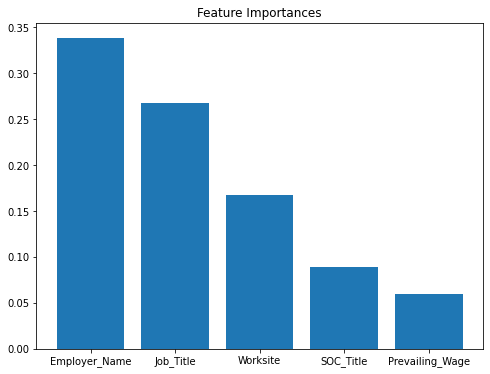

In [268]:

# Adding importances of numerical features
for feature, importance in zip(numerical_cols, feature_importances[len(ohe_feature_names):]):
    original_feature_importances[feature] += importance

# Sorting features by importance
sorted_features = sorted(original_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Selecting top 10 features
top_features = sorted_features[:5]
top_feature_names, top_feature_scores = zip(*top_features)

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(len(top_feature_scores)), top_feature_scores, align='center')
plt.xticks(range(len(top_feature_scores)), top_feature_names)
plt.show()

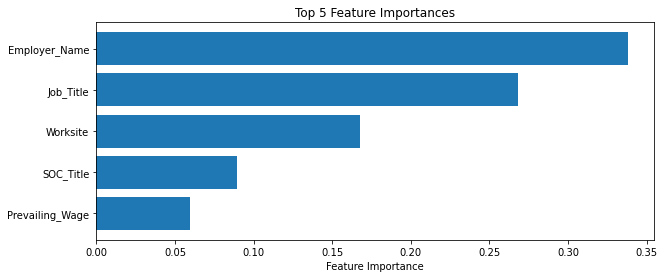

In [269]:
plt.figure(figsize=(10, 4))
plt.title("Top 5 Feature Importances")
plt.barh(range(len(top_feature_scores)), top_feature_scores, align='center')
plt.yticks(range(len(top_feature_scores)), top_feature_names)
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()